In [1]:
%matplotlib inline
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Import Python Pandas library (to create DataFrames) --this description can be found at mode.com,
# top result returned from a Google search
import pandas as pd

In [2]:
# Create a new engine instance; argument indicates database dialect and connection arguments
## Beginning text of above comment as described at SQLAlchemy 1.4 Documentation website:
## https://docs.sqlalchemy.org/en/14/core/engines.html?highlight=create_engine#sqlalchemy.create_engine
### parent directory syntax below to find database file, as demonstrated in Module 9 activity files, as
### well as class instruction for the module.
engine = create_engine("sqlite:///../hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
## temps_june = session.query(Measurement.date, Measurement.tobs).\
##                  filter(Measurement.date)
### realized at this point that `extract` was for checking the components of the Measurement.date,
### but uncertain how to write proper syntax reading through documentation at SQLAlchemy website;
### reading response #1 of stackoverflow.com question (found via Google search) was a more clear
### example -- the code below is adapted from that answer --website address is:
### https://stackoverflow.com/questions/12019766/how-to-get-month-and-year-from-date-field-in-sqlalchemy

month = r'06' # raw text expression, month of June
expr = session.query(Measurement.date, Measurement.tobs).\
        filter(extract('month', Measurement.date) == month).\
        order_by(Measurement.date).all()
for row in expr:
    print(row)

('2010-06-01', 78.0)
('2010-06-01', 74.0)
('2010-06-01', 73.0)
('2010-06-01', 77.0)
('2010-06-01', 69.0)
('2010-06-01', 76.0)
('2010-06-01', 71.0)
('2010-06-01', 74.0)
('2010-06-01', 70.0)
('2010-06-02', 76.0)
('2010-06-02', 76.0)
('2010-06-02', 72.0)
('2010-06-02', 76.0)
('2010-06-02', 70.0)
('2010-06-02', 76.0)
('2010-06-02', 71.0)
('2010-06-02', 76.0)
('2010-06-02', 78.0)
('2010-06-03', 78.0)
('2010-06-03', 75.0)
('2010-06-03', 74.0)
('2010-06-03', 77.0)
('2010-06-03', 67.0)
('2010-06-03', 76.0)
('2010-06-03', 72.0)
('2010-06-03', 78.0)
('2010-06-03', 73.0)
('2010-06-04', 76.0)
('2010-06-04', 75.0)
('2010-06-04', 73.0)
('2010-06-04', 75.0)
('2010-06-04', 70.0)
('2010-06-04', 73.0)
('2010-06-04', 72.0)
('2010-06-04', 74.0)
('2010-06-04', 68.0)
('2010-06-05', 77.0)
('2010-06-05', 74.0)
('2010-06-05', 72.0)
('2010-06-05', 73.0)
('2010-06-05', 78.0)
('2010-06-05', 76.0)
('2010-06-05', 79.0)
('2010-06-05', 79.0)
('2010-06-06', 78.0)
('2010-06-06', 75.0)
('2010-06-06', 75.0)
('2010-06-06'

In [5]:
#  3. Convert the June temperatures to a list.
temps_jun = list(expr)
temps_jun

[('2010-06-01', 78.0),
 ('2010-06-01', 74.0),
 ('2010-06-01', 73.0),
 ('2010-06-01', 77.0),
 ('2010-06-01', 69.0),
 ('2010-06-01', 76.0),
 ('2010-06-01', 71.0),
 ('2010-06-01', 74.0),
 ('2010-06-01', 70.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 72.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 70.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 71.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 78.0),
 ('2010-06-03', 78.0),
 ('2010-06-03', 75.0),
 ('2010-06-03', 74.0),
 ('2010-06-03', 77.0),
 ('2010-06-03', 67.0),
 ('2010-06-03', 76.0),
 ('2010-06-03', 72.0),
 ('2010-06-03', 78.0),
 ('2010-06-03', 73.0),
 ('2010-06-04', 76.0),
 ('2010-06-04', 75.0),
 ('2010-06-04', 73.0),
 ('2010-06-04', 75.0),
 ('2010-06-04', 70.0),
 ('2010-06-04', 73.0),
 ('2010-06-04', 72.0),
 ('2010-06-04', 74.0),
 ('2010-06-04', 68.0),
 ('2010-06-05', 77.0),
 ('2010-06-05', 74.0),
 ('2010-06-05', 72.0),
 ('2010-06-05', 73.0),
 ('2010-06-05', 78.0),
 ('2010-06-05', 76.0),
 ('2010-06-05', 79.0),
 ('2010-06-

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
temps_jun_df = pd.DataFrame(temps_jun, columns = ['Date', 'June Temps'])
temps_jun_df #.head()

,Date,June Temps
0,2010-06-01,78.0
1,2010-06-01,74.0
2,2010-06-01,73.0
3,2010-06-01,77.0
4,2010-06-01,69.0
...,...,...
1695,2017-06-30,81.0
1696,2017-06-30,74.0
1697,2017-06-30,75.0
1698,2017-06-30,76.0


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
temps_jun_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
month = r'12' # raw text expression, month of December
# expr = session.query(Measurement.date, Measurement.tobs).\
#         filter(extract('month', Measurement.date)==month).\
#         order_by(Measurement.date).all()
query_dec = session.query(Measurement.date, Measurement.tobs).\
        filter(extract('month', Measurement.date)==month).\
        order_by(Measurement.date)

In [9]:
# 7. Convert the December temperatures to a list.
#temps_dec = list(expr)
temps_dec = query_dec.all()
temps_dec

[('2010-12-01', 76.0),
 ('2010-12-01', 73.0),
 ('2010-12-01', 73.0),
 ('2010-12-01', 72.0),
 ('2010-12-01', 78.0),
 ('2010-12-01', 72.0),
 ('2010-12-01', 70.0),
 ('2010-12-01', 71.0),
 ('2010-12-02', 72.0),
 ('2010-12-02', 73.0),
 ('2010-12-02', 75.0),
 ('2010-12-02', 71.0),
 ('2010-12-02', 74.0),
 ('2010-12-02', 71.0),
 ('2010-12-02', 74.0),
 ('2010-12-02', 70.0),
 ('2010-12-03', 74.0),
 ('2010-12-03', 73.0),
 ('2010-12-03', 71.0),
 ('2010-12-03', 70.0),
 ('2010-12-03', 74.0),
 ('2010-12-03', 72.0),
 ('2010-12-03', 74.0),
 ('2010-12-03', 67.0),
 ('2010-12-04', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-04', 72.0),
 ('2010-12-04', 78.0),
 ('2010-12-04', 74.0),
 ('2010-12-04', 75.0),
 ('2010-12-04', 77.0),
 ('2010-12-05', 73.0),
 ('2010-12-05', 71.0),
 ('2010-12-05', 73.0),
 ('2010-12-05', 78.0),
 ('2010-12-05', 66.0),
 ('2010-12-05', 69.0),
 ('2010-12-05', 69.0),
 ('2010-12-06', 64.0),
 ('2010-12-06', 66.0),
 ('2010-12-06', 64.0),
 ('2010-12-06', 66.0),
 ('2010-12-06', 78.0),
 ('2010-12-

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
temps_dec_df = pd.DataFrame(temps_dec, columns = ['Date', 'December Temps'])
temps_dec_df #.head()

,Date,December Temps
0,2010-12-01,76.0
1,2010-12-01,73.0
2,2010-12-01,73.0
3,2010-12-01,72.0
4,2010-12-01,78.0
...,...,...
1512,2016-12-31,66.0
1513,2016-12-31,71.0
1514,2016-12-31,72.0
1515,2016-12-31,67.0


In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
temps_dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [12]:
# 1st additional query:
# ---------------------
# check stations with outlying low temperatures according to December Temps statistics
# Since IQR in the results table (from the cell above) is 5 (= 74 - 69), 1.5 X IQR = 7.5;
# --> will be looking at stations with lower than 61.5° [25% - 1.5xIQR, or 69 - 7.5] readings.

query_first = session.query(Measurement.date, Measurement.tobs, Measurement.station,
                    Station.name, Station.elevation).\
                    join(Station, Measurement.station==Station.station).\
                    filter(Measurement.tobs < 61.5).\
                    order_by(Measurement.station).\
                    order_by(extract('year', Measurement.date)).\
                    order_by(extract('month', Measurement.date)) #.\
                    #distinct(Measurement.station)

print(query_first, '\n')
    
print(len(query_first.all()))

for row in query_first.all():
    print(row)

SELECT measurement.date AS measurement_date, measurement.tobs AS measurement_tobs, measurement.station AS measurement_station, station.name AS station_name, station.elevation AS station_elevation 
FROM measurement JOIN station ON measurement.station = station.station 
WHERE measurement.tobs < ? ORDER BY measurement.station, CAST(STRFTIME('%Y', measurement.date) AS INTEGER), CAST(STRFTIME('%m', measurement.date) AS INTEGER) 

210
('2010-01-12', 57.0, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 0.9)
('2010-01-13', 57.0, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 0.9)
('2010-01-15', 56.0, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 0.9)
('2010-01-19', 61.0, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 0.9)
('2010-01-22', 60.0, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 0.9)
('2010-02-08', 60.0, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 0.9)
('2010-02-09', 61.0, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 0.9)
('2010-02-10', 60.0, 

In [13]:
# 2nd additional query:
# ---------------------
# Sum precipitation values -- by station -- for a specified date range; here the range is the
# month of June 2017 (June for most recent year of data). Note that the long query text is put
# together from multiple smaller text expressions before being run. Also note, `engine.execute()`
# seems not to persist beyond one additional command, so made that one additional command to
# assign to a variable, rather than running its `.all()` method/attribute only."
start_date = "'2017-06-01'"
end_date = "'2017-06-30'"

exp1 = "SELECT Min(Measurement.date) AS 'DatBeg', Max(Measurement.date) AS 'DatEnd', Sum(Measurement.prcp) AS 'Total_prcp', Min(Measurement.station), Min(Station.name) FROM 'Measurement'"
exp2 = "INNER JOIN Station ON Station.station == Measurement.station"
exp3 = "WHERE Measurement.date >= " + start_date + " AND Measurement.date <= " + end_date
exp4 = "GROUP BY Measurement.station;"

expr = exp1 + ' ' + exp2 + ' ' + exp3 + ' ' + exp4
print(expr)

# results_expr = engine.execute(expr)
# # print(len(results_expr.all()))
# # print(type(results_expr.all()))
# # print(type(results_expr))
# # print(f"\n{results_expr.all()}")
# # type(engine.execute())
# # for row in results_expr.all():
# #       print(row)
# results_expr_all = results_expr.all()

# print(len(results_expr.all())) # empty
# print(results_expr.all()) # empty

# # print(results_expr_all)
# print(len(results_expr_all))
# for row in results_expr_all:
#     print(row)

# results_expr_try = engine.execute("SELECT Min(Measurement.date) AS 'DatBeg', Max(Measurement.date) AS 'DatEnd', Sum(Measurement.prcp) AS 'Total_prcp', Min(Measurement.station), Min(Station.name) FROM 'Measurement'"
# + r" INNER JOIN Station ON Station.station == Measurement.station"
# + r" WHERE Measurement.date >= " + start_date + r" AND Measurement.date <= " + end_date
# + r" GROUP BY Measurement.station;")

# results_expr_try.all()

query_second = engine.execute(expr)
query_second_all = query_second.all()
# # print(len(query_second.all()))
# print(query_second.all())

# for row in query_second.all():
#     print(row)
# print('\n', len(query_second.all()))

# query_second_try_persist = engine.execute("SELECT Min(Measurement.date) AS 'DatBeg', Max(Measurement.date) AS 'DatEnd', Sum(Measurement.prcp) AS 'Total_prcp', Min(Measurement.station), Min(Station.name) FROM 'Measurement'"
# + r" INNER JOIN Station ON Station.station == Measurement.station"
# + r" WHERE Measurement.date >= " + start_date + r" AND Measurement.date <= " + end_date
# + r" GROUP BY Measurement.station;")
# print(len(query_second_try_persist.all()))
# print(query_second_try_persist.all())
# query_second_try_persist.all()

print('\n', len(query_second_all))
query_second_all


SELECT Min(Measurement.date) AS 'DatBeg', Max(Measurement.date) AS 'DatEnd', Sum(Measurement.prcp) AS 'Total_prcp', Min(Measurement.station), Min(Station.name) FROM 'Measurement' INNER JOIN Station ON Station.station == Measurement.station WHERE Measurement.date >= '2017-06-01' AND Measurement.date <= '2017-06-30' GROUP BY Measurement.station;

 7


[('2017-06-01', '2017-06-30', 2.9799999999999995, 'USC00513117', 'KANEOHE 838.1, HI US'),
 ('2017-06-01', '2017-06-30', 2.6, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('2017-06-01', '2017-06-30', 9.299999999999997, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US'),
 ('2017-06-02', '2017-06-30', 0.12, 'USC00517948', 'PEARL CITY, HI US'),
 ('2017-06-01', '2017-06-30', 4.26, 'USC00519281', 'WAIHEE 837.5, HI US'),
 ('2017-06-01', '2017-06-30', 0.37000000000000005, 'USC00519397', 'WAIKIKI 717.2, HI US'),
 ('2017-06-01', '2017-06-30', 0.8900000000000001, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US')]

###################################################
... Cells below here for only for test purposes ...  

In [14]:
temps_dec_df[temps_dec_df['December Temps'] == temps_dec_df['December Temps'].min()]

,Date,December Temps
1127,2014-12-31,56.0
1130,2014-12-31,56.0


In [15]:
temps_dec_df[temps_dec_df['December Temps'] == temps_dec_df['December Temps'].max()]

,Date,December Temps
734,2013-12-08,83.0


In [16]:
temps_jun_df[temps_jun_df['June Temps'] == temps_jun_df['June Temps'].min()]

,Date,June Temps
1318,2016-06-01,64.0


In [17]:
temps_jun_df[temps_jun_df['June Temps'] == temps_jun_df['June Temps'].max()]

,Date,June Temps
159,2010-06-20,85.0


In [18]:
temps_jun_df[temps_jun_df['June Temps'] >= 85]

,Date,June Temps
159,2010-06-20,85.0


In [19]:
temp_list = session.query(Measurement.date, Measurement.tobs).\
        filter(Measurement.date >= '2017-06-01').\
        order_by(Measurement.date)

temp_df = pd.DataFrame(temp_list, columns = ['date', 'tobs'])


In [20]:
temp_df[temp_df['date']=='2017-06-01'].describe()

,tobs
count,6.000000
mean,78.166667
std,2.639444
min,74.000000
25%,76.750000
50%,79.000000
75%,79.750000
max,81.000000


In [21]:
from sqlalchemy import inspect

In [22]:
inspector = inspect(engine)


#type(session.query(Measurement).limit(5))
#inspector(Measurement)

In [23]:
type(session.query(Measurement).limit(5))

sqlalchemy.orm.query.Query

In [24]:
type(session.query(Measurement).limit(5).all())

list

In [25]:
# Print all of the classes (tables) mapped to the Base
print(Base.classes.keys())

print(inspector.get_table_names())

print(type(inspector.get_columns('Measurement')))

print(inspector.get_columns('Measurement'))

print(type(inspector.get_columns('Station')))

print(inspector.get_columns('Station'))




['measurement', 'station']
['measurement', 'station']
<class 'list'>
[{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}]
<class 'list'>
[{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name

In [26]:
print(type(Base.classes.measurement))

print(type(Measurement))

<class 'sqlalchemy.orm.decl_api.DeclarativeMeta'>
<class 'sqlalchemy.orm.decl_api.DeclarativeMeta'>


In [27]:
# Using the inspector to print the column names within the 'Measurement' table and its types
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [28]:
# Using the inspector to print the column names within the 'Station' table and its types
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [29]:
results = engine.execute("SELECT * FROM 'Measurement';")
print(type(results.columns))
print(results.columns)

print(type(results.columns()))
print(results.columns())

dir(inspector)

<class 'method'>
<bound method Result.columns of <sqlalchemy.engine.cursor.LegacyCursorResult object at 0x000001C6AA965E88>>
<class 'sqlalchemy.engine.cursor.LegacyCursorResult'>


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_connectable_insp',
 '_connection_insp',
 '_construct',
 '_engine_insp',
 '_index_sort_exprs',
 '_init_connection',
 '_init_engine',
 '_init_legacy',
 '_inspection_context',
 '_op_context_requires_connect',
 '_operation_context',
 '_reflect_check_constraints',
 '_reflect_col_sequence',
 '_reflect_column',
 '_reflect_fk',
 '_reflect_indexes',
 '_reflect_pk',
 '_reflect_table_comment',
 '_reflect_unique_constraints',
 'bind',
 'default_schema_name',
 'dialect',
 'engine',
 'from_engine',
 'get_check_constraints',
 'get_columns',
 'get_foreign_keys',
 'get_indexes',
 'get_pk_constraint',
 'get_schema_names',
 'get_sequence_

In [30]:
inspector.get_columns('Measurement')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [31]:
type(results)

sqlalchemy.engine.cursor.LegacyCursorResult

In [32]:
inspector.get_columns("Station")

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

<AxesSubplot:>

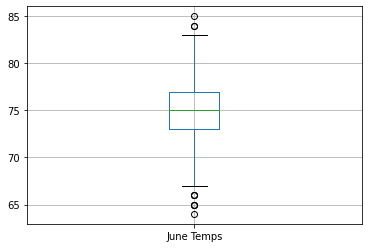

In [33]:
temps_jun_df.boxplot()

<AxesSubplot:>

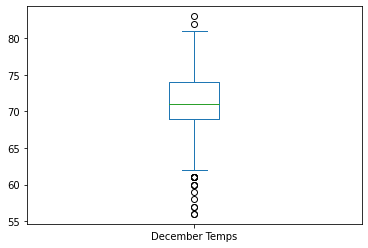

In [34]:
temps_dec_df.plot.box()

In [35]:
query_plus_one = session.query(Measurement.date, Measurement.station, Measurement.tobs).\
                 filter(extract('month', Measurement.date)=='12').\
                 filter(Measurement.tobs < 61.5 ).all()
print(query_plus_one)

[('2014-12-25', 'USC00519397', 61.0), ('2014-12-31', 'USC00519397', 56.0), ('2010-12-06', 'USC00519523', 61.0), ('2014-12-31', 'USC00519523', 56.0), ('2010-12-06', 'USC00519281', 61.0), ('2010-12-07', 'USC00519281', 58.0), ('2010-12-08', 'USC00519281', 60.0), ('2014-12-10', 'USC00519281', 61.0), ('2014-12-25', 'USC00519281', 60.0), ('2014-12-31', 'USC00519281', 59.0), ('2012-12-23', 'USC00511918', 61.0), ('2014-12-29', 'USC00511918', 57.0), ('2014-12-31', 'USC00511918', 57.0), ('2010-12-06', 'USC00516128', 61.0), ('2016-12-16', 'USC00516128', 60.0)]


In [36]:
# print(len(q1p.all()))

# print(type(q1p.first()[0]))